In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyam

%matplotlib inline

In [5]:
df = pyam.IamDataFrame(data='tutorial_AR5_data.csv', encoding='utf-8')

INFO:root:Reading `tutorial_AR5_data.csv`


In [6]:
df.models()

0    AIM-Enduse 12.1
1           GCAM 3.0
2          IMAGE 2.4
3        MERGE_EMF27
4        MESSAGE V.4
5         REMIND 1.5
6        WITCH_EMF27
Name: model, dtype: object

In [7]:
df.regions()

0      ASIA
1       LAM
2       MAF
3    OECD90
4       REF
5     World
Name: region, dtype: object

In [8]:
df.variables(include_units=True)

,variable,unit
0,Emissions|CO2,Mt CO2/yr
1,Emissions|CO2|Fossil Fuels and Industry,Mt CO2/yr
3,Emissions|CO2|Fossil Fuels and Industry|Energy...,Mt CO2/yr
4,Emissions|CO2|Fossil Fuels and Industry|Energy...,Mt CO2/yr
5,Price|Carbon,US$2005/t CO2
2,Primary Energy,EJ/yr
6,Primary Energy|Coal,EJ/yr
7,Primary Energy|Fossil|w/ CCS,EJ/yr
8,Temperature|Global Mean|MAGICC6|MED,°C


In [9]:
df.filter(model='MESSAGE').models()

Series([], Name: model, dtype: object)

In [10]:
df.filter(model='MESSAGE*')[['model', 'scenario']].drop_duplicates()

,model,scenario
3665,MESSAGE V.4,AMPERE3-450
3731,MESSAGE V.4,AMPERE3-450P-EU
3797,MESSAGE V.4,AMPERE3-550
3863,MESSAGE V.4,AMPERE3-RefPol
3929,MESSAGE V.4,EMF27-550-LimBio
4193,MESSAGE V.4,EMF27-Base-FullTech


In [11]:
df.filter(region="World", keep=False).regions()

0      ASIA
1       LAM
2       MAF
3    OECD90
4       REF
Name: region, dtype: object

In [12]:
df.filter(variable='Emissions|*').variables()

0                                        Emissions|CO2
1              Emissions|CO2|Fossil Fuels and Industry
2    Emissions|CO2|Fossil Fuels and Industry|Energy...
3    Emissions|CO2|Fossil Fuels and Industry|Energy...
Name: variable, dtype: object

In [13]:
df.filter(variable='Emissions|*', level=1).variables()

0    Emissions|CO2|Fossil Fuels and Industry
Name: variable, dtype: object

In [14]:
df.filter(variable='Emissions|*', level='1-').variables()

0                              Emissions|CO2
1    Emissions|CO2|Fossil Fuels and Industry
Name: variable, dtype: object

In [15]:
df.filter(level='1-').variables()

0          Emissions|CO2
1         Primary Energy
2           Price|Carbon
3    Primary Energy|Coal
Name: variable, dtype: object

In [16]:
df.filter?

In [17]:
(df
 .filter(scenario='AMPERE3-450', variable='Primary Energy|Coal', region='World')
 .timeseries()
)

,,,,,2005,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100
model,scenario,region,variable,unit,,,,,,,,,,,
GCAM 3.0,AMPERE3-450,World,Primary Energy|Coal,EJ/yr,120.76,144.95,176.44,204.42,212.84,186.02,138.23,106.98,82.44,36.55,14.89
IMAGE 2.4,AMPERE3-450,World,Primary Energy|Coal,EJ/yr,111.62,138.69,148.60,121.24,102.62,101.41,111.41,138.40,181.03,224.03,264.77
MESSAGE V.4,AMPERE3-450,World,Primary Energy|Coal,EJ/yr,121.12,138.09,119.94,93.11,52.07,71.91,98.09,127.76,136.08,108.49,41.21
REMIND 1.5,AMPERE3-450,World,Primary Energy|Coal,EJ/yr,122.20,135.47,92.72,45.87,22.33,20.39,16.64,12.35,5.94,2.36,1.77


In [18]:
(df
 .filter(variable='Primary Energy', region='World')
 .pivot_table(index=['year'], columns=['scenario'], values='value', aggfunc='sum')
)

scenario,AMPERE3-450,AMPERE3-450P-CE,AMPERE3-450P-EU,AMPERE3-550,AMPERE3-550P-EU,AMPERE3-Base-EUback,AMPERE3-CF450P-EU,AMPERE3-RefPol,EMF27-450-Conv,EMF27-450-NoCCS,EMF27-550-LimBio,EMF27-Base-FullTech,EMF27-G8-EERE
year,,,,,,,,,,,,,
2005,1821.09,1366.48,1821.09,1818.71,464.82,922.58,925.23,1818.44,2234.35,1381.84,3130.81,3130.60,868.79
2010,1972.13,1492.28,1972.02,1969.57,514.07,1015.78,1018.44,1969.50,2504.99,1542.90,3457.08,3459.28,985.16
2020,2253.49,1787.40,2399.41,2322.23,611.34,1258.24,1262.07,2401.37,2428.61,1424.26,3781.16,4135.65,947.08
2030,2530.95,2101.60,2863.85,2670.22,734.11,1532.12,1536.54,2869.96,2545.94,1470.64,4057.28,4846.37,933.08
2040,2795.47,2206.09,2940.96,3000.37,789.70,1802.62,1574.14,3305.70,2698.99,1670.51,4355.16,5588.19,1007.83
2050,3064.07,2348.02,3087.59,3312.70,815.79,2104.63,1652.02,3709.45,2759.41,1794.47,4586.40,6353.16,1075.16
2060,3321.63,2537.42,3317.84,3532.21,861.79,2359.38,1774.56,4056.44,2198.22,1257.99,4164.92,6172.01,531.36
2070,3512.57,2683.30,3526.56,3722.65,901.57,2564.68,1912.48,4391.18,2240.64,1344.42,4430.28,6768.95,563.62
2080,3689.77,2824.81,3724.06,3926.94,943.47,2708.68,2033.99,4700.20,2256.69,1461.97,4690.79,7288.74,568.90


In [19]:
df.head()

,model,scenario,region,variable,unit,year,value
0,AIM-Enduse 12.1,EMF27-450-Conv,ASIA,Emissions|CO2,Mt CO2/yr,2005,10540.74
1,AIM-Enduse 12.1,EMF27-450-Conv,ASIA,Emissions|CO2,Mt CO2/yr,2010,13160.18
2,AIM-Enduse 12.1,EMF27-450-Conv,ASIA,Emissions|CO2,Mt CO2/yr,2020,11899.38
3,AIM-Enduse 12.1,EMF27-450-Conv,ASIA,Emissions|CO2,Mt CO2/yr,2030,9545.81
4,AIM-Enduse 12.1,EMF27-450-Conv,ASIA,Emissions|CO2,Mt CO2/yr,2040,7355.07


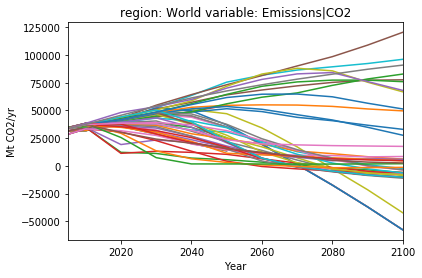

In [20]:
df.filter(variable='Emissions|CO2', region='World').line_plot(legend=False)

In [21]:
df.require_variable(variable='Primary Energy')

INFO:root:All scenarios have the required variable `Primary Energy`


In [22]:
df.validate(criteria={'Primary Energy': {'up': 515, 'year': 2010}})

INFO:root:9 of 6622 data points do not satisfy the criteria


,model,scenario,region,variable,unit,year,value
121,AIM-Enduse 12.1,EMF27-450-Conv,World,Primary Energy,EJ/yr,2010,518.89
259,AIM-Enduse 12.1,EMF27-450-NoCCS,World,Primary Energy,EJ/yr,2010,518.81
397,AIM-Enduse 12.1,EMF27-550-LimBio,World,Primary Energy,EJ/yr,2010,518.81
535,AIM-Enduse 12.1,EMF27-Base-FullTech,World,Primary Energy,EJ/yr,2010,518.81
673,AIM-Enduse 12.1,EMF27-G8-EERE,World,Primary Energy,EJ/yr,2010,518.64
5154,REMIND 1.5,EMF27-450-Conv,World,Primary Energy,EJ/yr,2010,519.64
5384,REMIND 1.5,EMF27-450-NoCCS,World,Primary Energy,EJ/yr,2010,519.64
5614,REMIND 1.5,EMF27-550-LimBio,World,Primary Energy,EJ/yr,2010,519.64
5835,REMIND 1.5,EMF27-Base-FullTech,World,Primary Energy,EJ/yr,2010,519.64


In [23]:
pyam.validate(df.filter(region='World', scenario='AMPERE*'),
              criteria={'Primary Energy|Coal': {'up': 400, 'year': 2050}}
)

INFO:root:1 of 1566 data points do not satisfy the criteria


,model,scenario,region,variable,unit,year,value
992,GCAM 3.0,AMPERE3-Base-EUback,World,Primary Energy|Coal,EJ/yr,2050,424.09


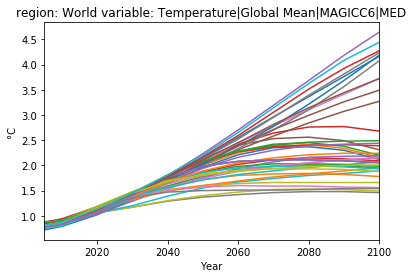

In [24]:
v = 'Temperature|Global Mean|MAGICC6|MED'
df.filter(region='World', variable=v).line_plot(legend=False)

In [25]:
df.set_meta(meta='uncategorized', name='Temperature')

In [26]:
df.categorize(
    'Temperature', 'Below 1.6C',
    criteria={v: {'up': 1.6, 'year': 2100}},
    color='cornflowerblue'
)

INFO:root:4 scenarios categorized as `Temperature: Below 1.6C`


In [27]:
df.categorize(
    'Temperature', 'Below 2.0C',
    criteria={'Temperature|Global Mean|MAGICC6|MED': {'up': 2.0, 'lo': 1.6, 'year': 2100}},
    color='forestgreen'
)

INFO:root:8 scenarios categorized as `Temperature: Below 2.0C`


In [28]:
df.categorize(
    'Temperature', 'Below 2.5C',
    criteria={v: {'up': 2.5, 'lo': 2.0, 'year': 2100}},
    color='gold'
)

INFO:root:16 scenarios categorized as `Temperature: Below 2.5C`


In [29]:
df.categorize(
    'Temperature', 'Below 3.5C',
     criteria={v: {'up': 3.5, 'lo': 2.5, 'year': 2100}},
     color='firebrick'
)

INFO:root:3 scenarios categorized as `Temperature: Below 3.5C`


In [30]:
df.categorize(
    'Temperature', 'Above 3.5C',
    criteria={v: {'lo': 3.5, 'year': 2100}},
    color='magenta'
)

INFO:root:9 scenarios categorized as `Temperature: Above 3.5C`


In [31]:
df.require_variable(variable=v, exclude_on_fail=False)

INFO:root:8 scenarios do not include required variable `Temperature|Global Mean|MAGICC6|MED`


,model,scenario
0,AIM-Enduse 12.1,EMF27-450-Conv
1,AIM-Enduse 12.1,EMF27-450-NoCCS
2,AIM-Enduse 12.1,EMF27-550-LimBio
3,AIM-Enduse 12.1,EMF27-Base-FullTech
4,AIM-Enduse 12.1,EMF27-G8-EERE
5,WITCH_EMF27,EMF27-450-Conv
6,WITCH_EMF27,EMF27-550-LimBio
7,WITCH_EMF27,EMF27-Base-FullTech


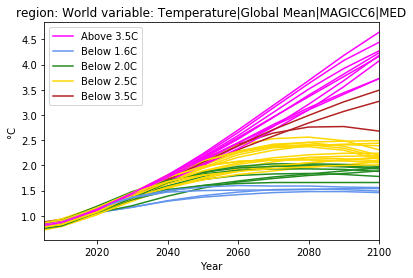

In [32]:
df.filter(variable=v).line_plot(color='Temperature', legend=True)

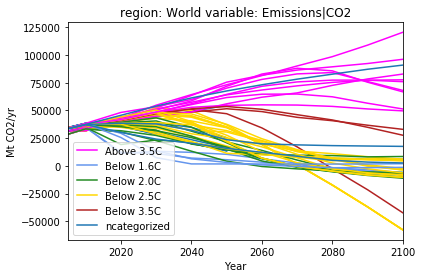

In [33]:
fig, ax = plt.subplots()
(df
 .filter(variable='Emissions|CO2', region='World')
 .line_plot(ax=ax, color='Temperature', legend=True)
)
fig.savefig('co2_emissions.png')

In [34]:
eoc = 'End-of-century-temperature'
df.set_meta_from_data(name='End-of-century-temperature', variable=v, year=2100)

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [35]:
peak = 'Peak-temperature'
df.set_meta_from_data(name='Peak-temperature', variable=v, method=np.max)

In [36]:
overshoot = df.meta[peak] - df.meta[eoc]

In [37]:
df.set_meta(name='Overshoot', meta=overshoot)

In [38]:
df.filter(Temperature='Below 2.0C').meta.head()

exclude Temperature  End-of-century-temperature  \
model       scenario                                                            
GCAM 3.0    EMF27-550-LimBio    False  Below 2.0C                        1.89   
IMAGE 2.4   AMPERE3-450         False  Below 2.0C                        1.78   
            AMPERE3-450P-CE     False  Below 2.0C                        1.95   
MERGE_EMF27 EMF27-450-Conv      False  Below 2.0C                        1.66   
            EMF27-G8-EERE       False  Below 2.0C                        1.95   

                              Peak-temperature  Overshoot  
model       scenario                                       
GCAM 3.0    EMF27-550-LimBio              1.89       0.00  
IMAGE 2.4   AMPERE3-450                   1.84       0.06  
            AMPERE3-450P-CE               2.01       0.06  
MERGE_EMF27 EMF27-450-Conv                1.66       0.00  
            EMF27-G8-EERE                 1.95       0.00

In [40]:
df.to_excel('tutorial_export.xlsx')
df.export_metadata('tutorial_metadata.xlsx')